# Predicting Creditworthiness

You work for a small bank and are responsible for determining if customers are creditworthy to give a loan to. Your team typically gets 200 loan applications per week and approves them by hand. <br>
Due to a financial scandal that hit a competitive bank last week, you suddenly have an influx of new people applying for loans for your bank instead of the other bank in your city. All of a sudden you have nearly 500 loan applications to process this week! <br>
Your manager sees this new influx as a great opportunity and wants you to figure out how to process all of these loan applications within one week. 


## Step 1: Business and Data Understanding

We need to evaluate the creditworthiness of 500 new loan applicants within a week. To do this, we have to create a binary classification model based on the data that we have from previous applications. By applying the trained model on our dataset of new applicants, we will be able to systematically predict which potential customers are creditworthy and which are not.

## Step 2: Explore and Cleanup the Data

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [32]:
df = pd.read_excel('credit-data-training.xlsx')
df.head()

Credit-Application-Result Account-Balance  Duration-of-Credit-Month  \
0              Creditworthy    Some Balance                         4   
1              Creditworthy    Some Balance                         4   
2              Creditworthy    Some Balance                         4   
3              Creditworthy    Some Balance                         4   
4              Creditworthy      No Account                         6   

  Payment-Status-of-Previous-Credit       Purpose  Credit-Amount  \
0                           Paid Up         Other           1494   
1                           Paid Up  Home Related           1494   
2        No Problems (in this bank)  Home Related           1544   
3        No Problems (in this bank)  Home Related           3380   
4                           Paid Up  Home Related            343   

  Value-Savings-Stocks Length-of-current-employment  Instalment-per-cent  \
0           £100-£1000                        < 1yr                    1   
1           £100-£1000                        < 1yr                    1   
2                 None                      1-4 yrs                    2   
3                 None                      1-4 yrs                    1   
4                 None                        < 1yr                    4   

  Guarantors  Duration-in-Current-address  Most-valuable-available-asset  \
0       None                          2.0                              1   
1       None                          2.0                              1   
2       None                          1.0                              1   
3       None                          1.0                              1   
4       None                          1.0                              1   

   Age-years Concurrent-Credits  Type-of-apartment No-of-Credits-at-this-Bank  \
0        NaN  Other Banks/Depts                  2                          1   
1       29.0  Other Banks/Depts                  2                          1   
2       42.0  Other Banks/Depts                  2                More than 1   
3       37.0  Other Banks/Depts                  2                          1   
4       27.0  Other Banks/Depts                  2                          1   

   Occupation  No-of-dependents  Telephone  Foreign-Worker  
0           1                 2          1               2  
1           1                 2          1               2  
2           1                 2          1               1  
3           1                 2          1               1  
4           1                 1          1               1

In [33]:
df.describe()

Duration-of-Credit-Month  Credit-Amount  Instalment-per-cent  \
count                 500.00000     500.000000           500.000000   
mean                   21.43400    3199.980000             3.010000   
std                    12.30742    2831.386861             1.113724   
min                     4.00000     276.000000             1.000000   
25%                    12.00000    1357.250000             2.000000   
50%                    18.00000    2236.500000             3.000000   
75%                    24.00000    3941.500000             4.000000   
max                    60.00000   18424.000000             4.000000   

       Duration-in-Current-address  Most-valuable-available-asset   Age-years  \
count                   156.000000                     500.000000  488.000000   
mean                      2.660256                       2.360000   35.637295   
std                       1.150017                       1.064268   11.501522   
min                       1.000000                       1.000000   19.000000   
25%                       2.000000                       1.000000   27.000000   
50%                       2.000000                       3.000000   33.000000   
75%                       4.000000                       3.000000   42.000000   
max                       4.000000                       4.000000   75.000000   

       Type-of-apartment  Occupation  No-of-dependents   Telephone  \
count         500.000000       500.0         500.00000  500.000000   
mean            1.928000         1.0           1.14600    1.400000   
std             0.539814         0.0           0.35346    0.490389   
min             1.000000         1.0           1.00000    1.000000   
25%             2.000000         1.0           1.00000    1.000000   
50%             2.000000         1.0           1.00000    1.000000   
75%             2.000000         1.0           1.00000    2.000000   
max             3.000000         1.0           2.00000    2.000000   

       Foreign-Worker  
count      500.000000  
mean         1.038000  
std          0.191388  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          2.000000

/Users/kbosko/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kbosko/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


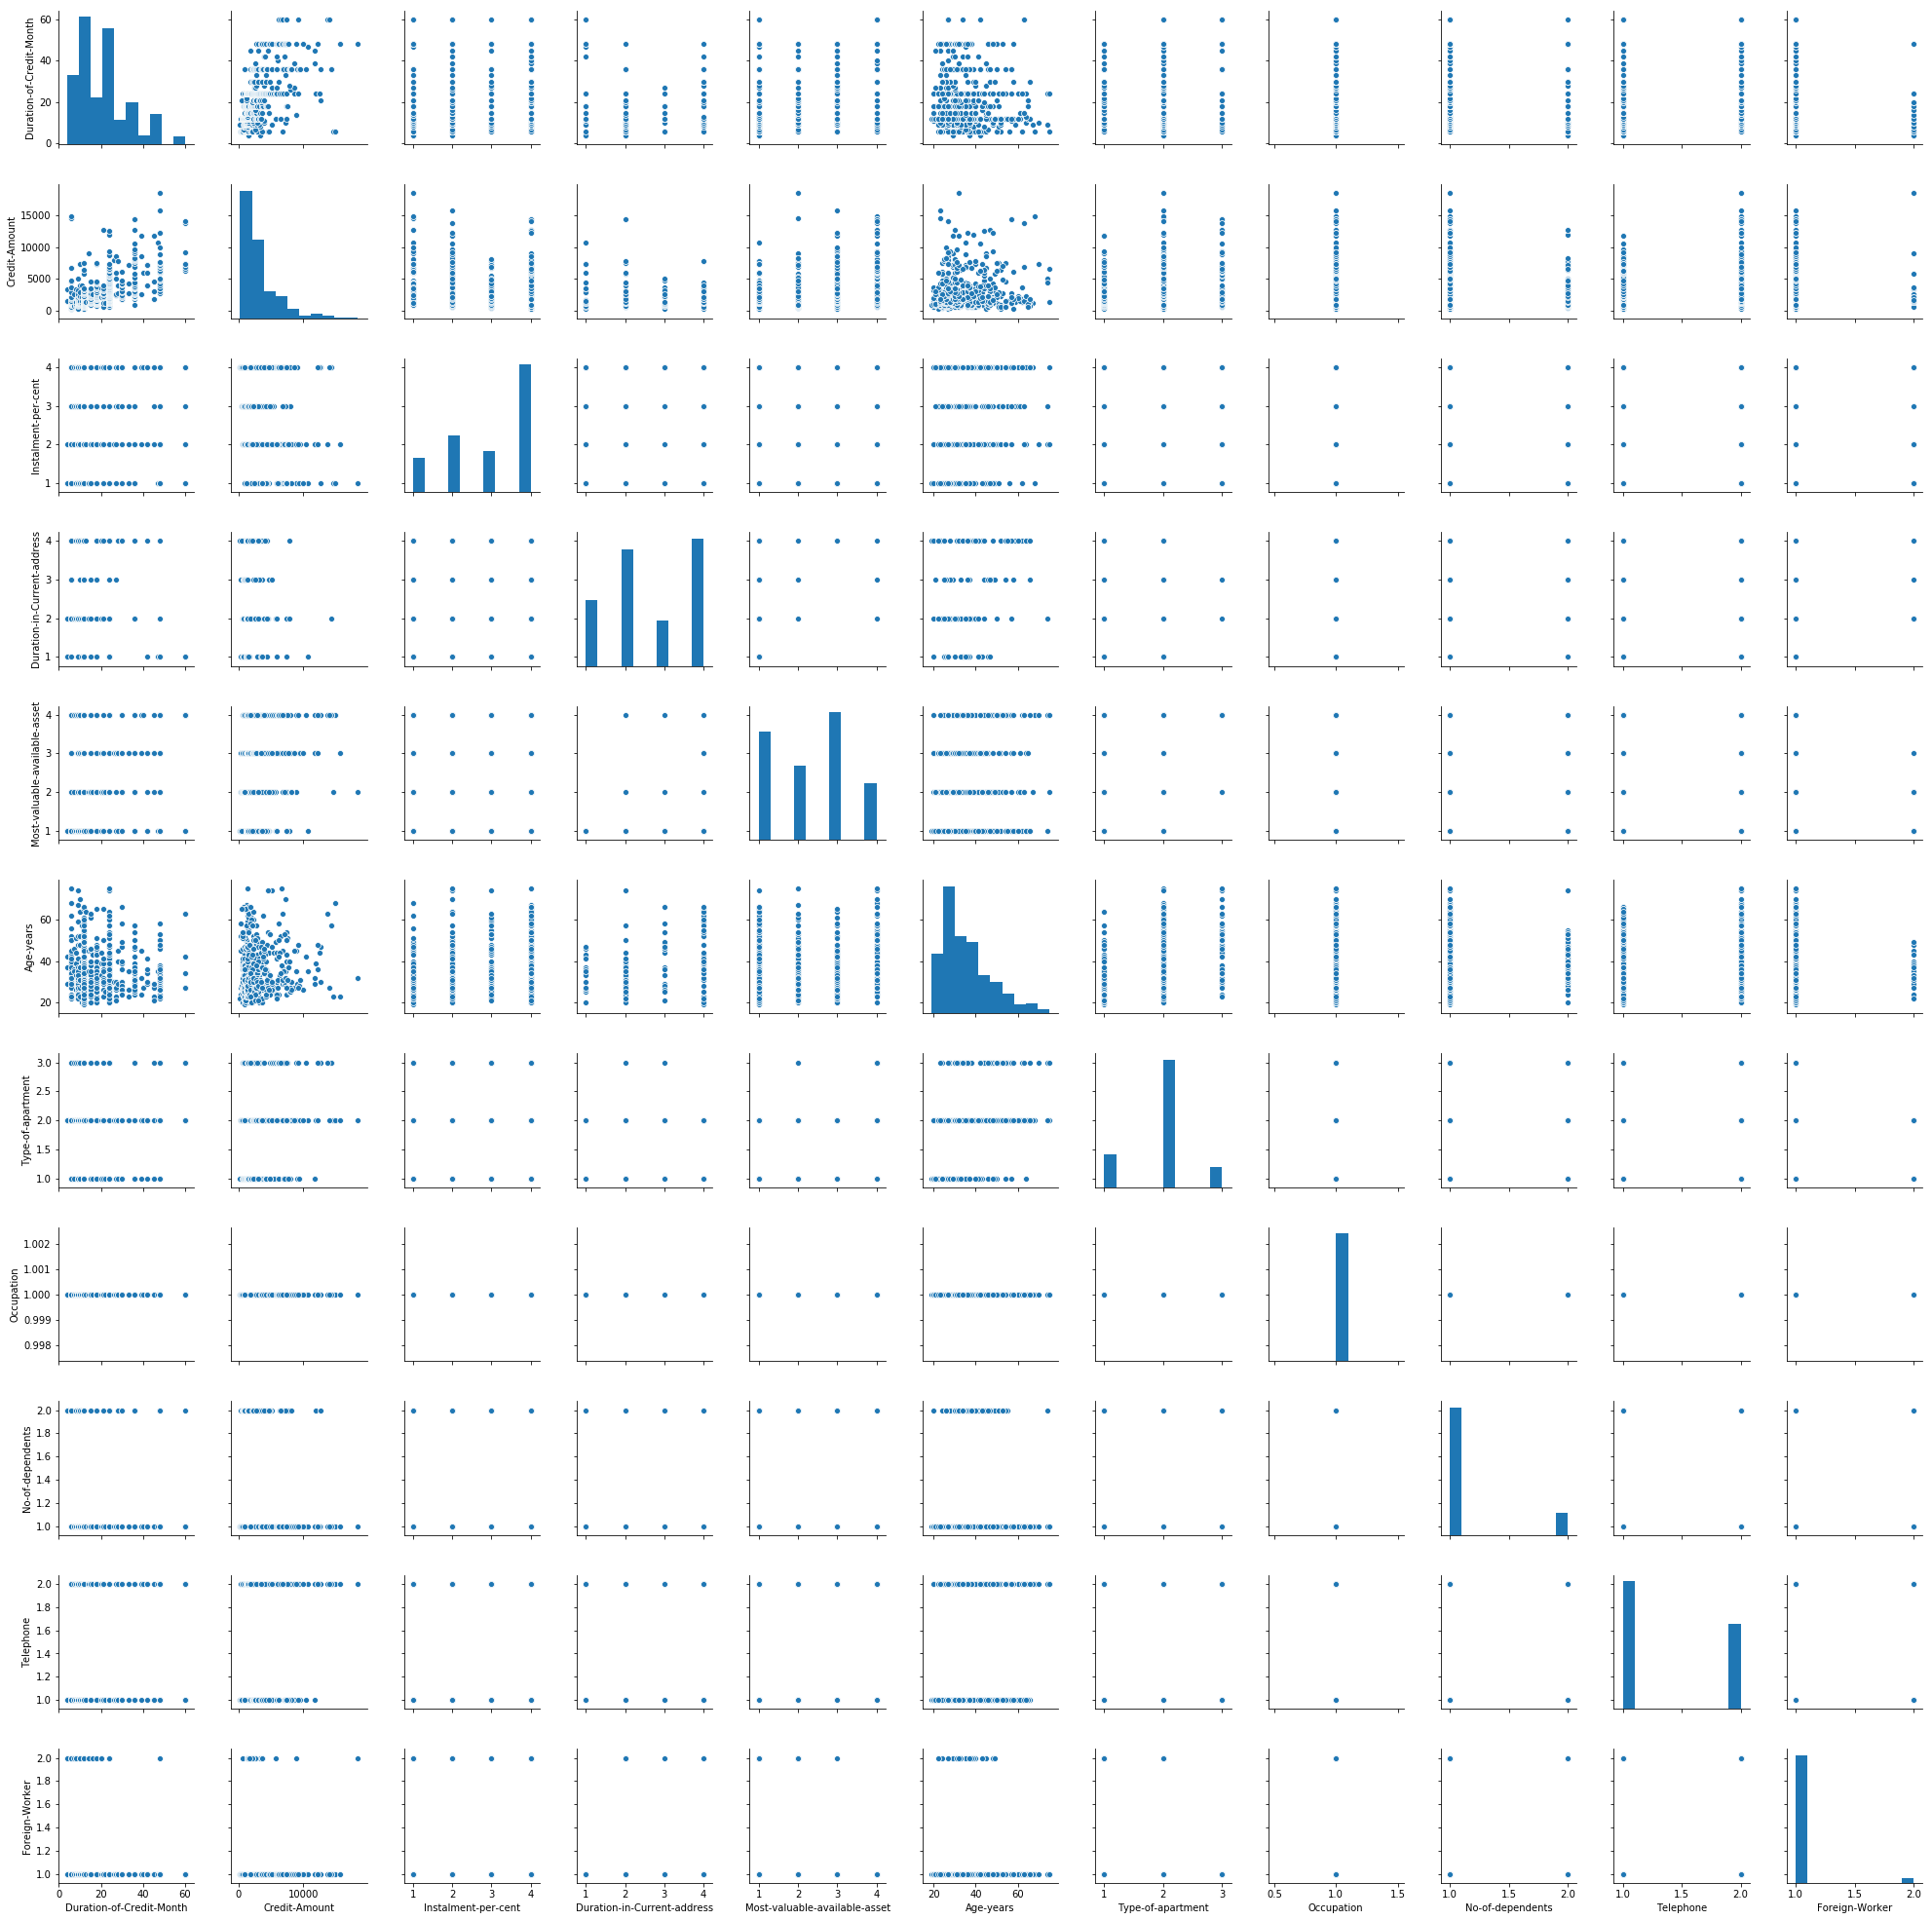

In [11]:
sns.pairplot(df);

Duration-in-Current Address has too many missing values, therefore there variables won't be used in the classification model. Guarantors, Concurrent-Credits, Occupation, No-of-Dependents, Foreign-Worker removed due to low variability (either have only one value or heavily skewed towards one value). 'Telephone' variable removed because it has no logical connection with the target.

In [61]:
df_clean = df.iloc[:, :-4]
df_cleaned = df_clean.drop(columns=['Concurrent-Credits', 'Guarantors', 'Duration-in-Current-address'])
df_cleaned.head()

Credit-Application-Result Account-Balance  Duration-of-Credit-Month  \
0              Creditworthy    Some Balance                         4   
1              Creditworthy    Some Balance                         4   
2              Creditworthy    Some Balance                         4   
3              Creditworthy    Some Balance                         4   
4              Creditworthy      No Account                         6   

  Payment-Status-of-Previous-Credit       Purpose  Credit-Amount  \
0                           Paid Up         Other           1494   
1                           Paid Up  Home Related           1494   
2        No Problems (in this bank)  Home Related           1544   
3        No Problems (in this bank)  Home Related           3380   
4                           Paid Up  Home Related            343   

  Value-Savings-Stocks Length-of-current-employment  Instalment-per-cent  \
0           £100-£1000                        < 1yr                    1   
1           £100-£1000                        < 1yr                    1   
2                 None                      1-4 yrs                    2   
3                 None                      1-4 yrs                    1   
4                 None                        < 1yr                    4   

   Most-valuable-available-asset  Age-years  Type-of-apartment  \
0                              1        NaN                  2   
1                              1       29.0                  2   
2                              1       42.0                  2   
3                              1       37.0                  2   
4                              1       27.0                  2   

  No-of-Credits-at-this-Bank  
0                          1  
1                          1  
2                More than 1  
3                          1  
4                          1

Imputing missing values for Age-Years with median:

In [62]:
#checking if there are any missing values
df_cleaned['Age-years'].isna().sum()

12

In [63]:
df_cleaned['Age-years'] = df_cleaned['Age-years'].fillna(df['Age-years'].median())
#checking if imputing was done
df_cleaned['Age-years'].isna().sum()

0

## Step 3: Building the Training Set

In [120]:
# Store the target variable in a new variable 'outcomes' and remove it from the dataset
outcomes_raw = df_cleaned['Credit-Application-Result']
features_raw = df_cleaned.drop('Credit-Application-Result', axis = 1)

In [121]:
features_raw.head()

Account-Balance  Duration-of-Credit-Month Payment-Status-of-Previous-Credit  \
0    Some Balance                         4                           Paid Up   
1    Some Balance                         4                           Paid Up   
2    Some Balance                         4        No Problems (in this bank)   
3    Some Balance                         4        No Problems (in this bank)   
4      No Account                         6                           Paid Up   

        Purpose  Credit-Amount Value-Savings-Stocks  \
0         Other           1494           £100-£1000   
1  Home Related           1494           £100-£1000   
2  Home Related           1544                 None   
3  Home Related           3380                 None   
4  Home Related            343                 None   

  Length-of-current-employment  Instalment-per-cent  \
0                        < 1yr                    1   
1                        < 1yr                    1   
2                      1-4 yrs                    2   
3                      1-4 yrs                    1   
4                        < 1yr                    4   

   Most-valuable-available-asset  Age-years  Type-of-apartment  \
0                              1       33.0                  2   
1                              1       29.0                  2   
2                              1       42.0                  2   
3                              1       37.0                  2   
4                              1       27.0                  2   

  No-of-Credits-at-this-Bank  
0                          1  
1                          1  
2                More than 1  
3                          1  
4                          1

 ### One-hot encode the features and the outcomes

In [122]:
features = pd.get_dummies(features_raw)
features.head()

Duration-of-Credit-Month  Credit-Amount  Instalment-per-cent  \
0                         4           1494                    1   
1                         4           1494                    1   
2                         4           1544                    2   
3                         4           3380                    1   
4                         6            343                    4   

   Most-valuable-available-asset  Age-years  Type-of-apartment  \
0                              1       33.0                  2   
1                              1       29.0                  2   
2                              1       42.0                  2   
3                              1       37.0                  2   
4                              1       27.0                  2   

   Account-Balance_No Account  Account-Balance_Some Balance  \
0                           0                             1   
1                           0                             1   
2                           0                             1   
3                           0                             1   
4                           1                             0   

   Payment-Status-of-Previous-Credit_No Problems (in this bank)  \
0                                                  0              
1                                                  0              
2                                                  1              
3                                                  1              
4                                                  0              

   Payment-Status-of-Previous-Credit_Paid Up  ...  Purpose_Other  \
0                                          1  ...              1   
1                                          1  ...              0   
2                                          0  ...              0   
3                                          0  ...              0   
4                                          1  ...              0   

   Purpose_Used car  Value-Savings-Stocks_< £100  Value-Savings-Stocks_None  \
0                 0                            0                          0   
1                 0                            0                          0   
2                 0                            0                          1   
3                 0                            0                          1   
4                 0                            0                          1   

   Value-Savings-Stocks_£100-£1000  Length-of-current-employment_1-4 yrs  \
0                                1                                     0   
1                                1                                     0   
2                                0                                     1   
3                                0                                     1   
4                                0                                     0   

   Length-of-current-employment_4-7 yrs  Length-of-current-employment_< 1yr  \
0                                     0                                   1   
1                                     0                                   1   
2                                     0                                   0   
3                                     0                                   0   
4                                     0                                   1   

   No-of-Credits-at-this-Bank_1  No-of-Credits-at-this-Bank_More than 1  
0                             1                                       0  
1                             1                                       0  
2                             0                                       1  
3                             1                                       0  
4                             1                                       0  

[5 rows x 23 columns]

In [67]:
outcomes = pd.get_dummies(outcomes_raw)
outcomes = outcomes['Creditworthy']
outcomes.tail()

495    1
496    1
497    1
498    1
499    0
Name: Creditworthy, dtype: uint8

In [68]:
# checking if there are any missing values in the dataset
features.isna().sum()

Duration-of-Credit-Month                                        0
Credit-Amount                                                   0
Instalment-per-cent                                             0
Most-valuable-available-asset                                   0
Age-years                                                       0
Type-of-apartment                                               0
Account-Balance_No Account                                      0
Account-Balance_Some Balance                                    0
Payment-Status-of-Previous-Credit_No Problems (in this bank)    0
Payment-Status-of-Previous-Credit_Paid Up                       0
Payment-Status-of-Previous-Credit_Some Problems                 0
Purpose_Home Related                                            0
Purpose_New car                                                 0
Purpose_Other                                                   0
Purpose_Used car                                                0
Value-Savi

In [123]:
features.shape

(500, 23)

### Split the data into training and testing sets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=12)

In [75]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 400 samples.
Testing set has 100 samples.


## Step 4: Training the Models - Decision Tree, RandomForest, AdaBoost

In [85]:
model_dt = DecisionTreeClassifier(random_state=12)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [86]:
model_rf = RandomForestClassifier(random_state=12)
model_rf.fit(X_train, y_train)

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [87]:
model_ab = AdaBoostClassifier(random_state=12)
model_ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=12)

## Step 5: Testing the Model

In [116]:
def predict_evaluate(model):
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1score = f1_score(y_test, y_test_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    test_AUC = auc(fpr, tpr)
    
    print(f'Model: {model}')
    print(f'The test accuracy: {test_accuracy}')
    print(f'The test f1 score: {f1score}')
    print(f'The test AUC: {test_AUC}')

In [117]:
# Making predictions and printing the metrics
predict_evaluate(model_dt)

Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')
The test accuracy: 0.65
The test f1 score: 0.7407407407407408
The test AUC: 0.598901098901099


In [118]:
predict_evaluate(model_rf)

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)
The test accuracy: 0.73
The test f1 score: 0.8163265306122449
The test AUC: 0.6472527472527473


In [119]:
predict_evaluate(model_ab)

Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=12)
The test accuracy: 0.75
The test f1 score: 0.8344370860927152
The test AUC: 0.656043956043956


## Step 6: Optimizing the model

In [212]:
clf = RandomForestClassifier(random_state=12)

parameters = {"n_estimators": [50, 100, 200, 300, 400, 500],
             "max_features": [3, 5, 8, 10, 23]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(accuracy_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)
#grid_obj = RandomizedSearchCV(clf, param_distributions = parameters, scoring = scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.7300
F-score on testing data: 0.8163

Optimized Model
------
Final accuracy score on the testing data: 0.7700
Final F-score on the testing data: 0.8435


/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [213]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

## Step 7: Predicting Creditworthiness

Before scoring our model on a new data, we need to prepare the dataset by performing the same data transformations that we did on the training set.

In [124]:
df_score = pd.read_excel('customers-to-score.xlsx')
df_score.head()

Account-Balance  Duration-of-Credit-Month Payment-Status-of-Previous-Credit  \
0      No Account                         9        No Problems (in this bank)   
1      No Account                        12        No Problems (in this bank)   
2      No Account                        24                           Paid Up   
3      No Account                        11        No Problems (in this bank)   
4      No Account                         6        No Problems (in this bank)   

        Purpose  Credit-Amount Value-Savings-Stocks  \
0  Home Related           2799                 None   
1  Home Related           2122                 None   
2  Home Related           3758           £100-£1000   
3  Home Related           3905                 None   
4  Home Related           1957                 None   

  Length-of-current-employment  Instalment-per-cent Guarantors  \
0                        < 1yr                    2       None   
1                        < 1yr                    3       None   
2                        < 1yr                    1       None   
3                        < 1yr                    2       None   
4                      1-4 yrs                    1       None   

   Duration-in-Current-address  Most-valuable-available-asset  Age-years  \
0                            2                              1         36   
1                            2                              1         39   
2                            4                              4         23   
3                            2                              1         36   
4                            4                              3         31   

  Concurrent-Credits  Type-of-apartment No-of-Credits-at-this-Bank  \
0  Other Banks/Depts                  1                More than 1   
1  Other Banks/Depts                  1                More than 1   
2  Other Banks/Depts                  1                          1   
3  Other Banks/Depts                  1                More than 1   
4  Other Banks/Depts                  2                          1   

   Occupation  No-of-dependents  Telephone  Foreign-Worker  
0           1                 2          1               1  
1           1                 2          1               2  
2           1                 1          1               1  
3           1                 2          1               1  
4           1                 1          1               1

In [125]:
df_score.describe()

Duration-of-Credit-Month  Credit-Amount  Instalment-per-cent  \
count                500.000000     500.000000           500.000000   
mean                  20.254000    3300.400000             2.954000   
std                   11.766664    2806.153898             1.119997   
min                    4.000000     250.000000             1.000000   
25%                   12.000000    1381.750000             2.000000   
50%                   18.000000    2370.500000             3.000000   
75%                   24.000000    3967.500000             4.000000   
max                   72.000000   15945.000000             4.000000   

       Duration-in-Current-address  Most-valuable-available-asset   Age-years  \
count                   500.000000                        500.000  500.000000   
mean                      2.858000                          2.338   35.626000   
std                       1.108284                          1.044   11.296608   
min                       1.000000                          1.000   20.000000   
25%                       2.000000                          1.000   27.000000   
50%                       3.000000                          2.000   33.000000   
75%                       4.000000                          3.000   42.000000   
max                       4.000000                          4.000   74.000000   

       Type-of-apartment  Occupation  No-of-dependents   Telephone  \
count         500.000000       500.0        500.000000  500.000000   
mean            1.926000         1.0          1.166000    1.410000   
std             0.526382         0.0          0.372453    0.492326   
min             1.000000         1.0          1.000000    1.000000   
25%             2.000000         1.0          1.000000    1.000000   
50%             2.000000         1.0          1.000000    1.000000   
75%             2.000000         1.0          1.000000    2.000000   
max             3.000000         1.0          2.000000    2.000000   

       Foreign-Worker  
count      500.000000  
mean         1.040000  
std          0.196155  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          2.000000

In [126]:
df_score_clean = df_score.iloc[:, :-4]
df_score_cleaned = df_score_clean.drop(columns=['Concurrent-Credits', 'Guarantors', 'Duration-in-Current-address'])
df_score_cleaned.head()

Account-Balance  Duration-of-Credit-Month Payment-Status-of-Previous-Credit  \
0      No Account                         9        No Problems (in this bank)   
1      No Account                        12        No Problems (in this bank)   
2      No Account                        24                           Paid Up   
3      No Account                        11        No Problems (in this bank)   
4      No Account                         6        No Problems (in this bank)   

        Purpose  Credit-Amount Value-Savings-Stocks  \
0  Home Related           2799                 None   
1  Home Related           2122                 None   
2  Home Related           3758           £100-£1000   
3  Home Related           3905                 None   
4  Home Related           1957                 None   

  Length-of-current-employment  Instalment-per-cent  \
0                        < 1yr                    2   
1                        < 1yr                    3   
2                        < 1yr                    1   
3                        < 1yr                    2   
4                      1-4 yrs                    1   

   Most-valuable-available-asset  Age-years  Type-of-apartment  \
0                              1         36                  1   
1                              1         39                  1   
2                              4         23                  1   
3                              1         36                  1   
4                              3         31                  2   

  No-of-Credits-at-this-Bank  
0                More than 1  
1                More than 1  
2                          1  
3                More than 1  
4                          1

In [127]:
features_score = pd.get_dummies(df_score_cleaned)
features_score.head()

Duration-of-Credit-Month  Credit-Amount  Instalment-per-cent  \
0                         9           2799                    2   
1                        12           2122                    3   
2                        24           3758                    1   
3                        11           3905                    2   
4                         6           1957                    1   

   Most-valuable-available-asset  Age-years  Type-of-apartment  \
0                              1         36                  1   
1                              1         39                  1   
2                              4         23                  1   
3                              1         36                  1   
4                              3         31                  2   

   Account-Balance_No Account  Account-Balance_Some Balance  \
0                           1                             0   
1                           1                             0   
2                           1                             0   
3                           1                             0   
4                           1                             0   

   Payment-Status-of-Previous-Credit_No Problems (in this bank)  \
0                                                  1              
1                                                  1              
2                                                  0              
3                                                  1              
4                                                  1              

   Payment-Status-of-Previous-Credit_Paid Up  ...  Purpose_New car  \
0                                          0  ...                0   
1                                          0  ...                0   
2                                          1  ...                0   
3                                          0  ...                0   
4                                          0  ...                0   

   Purpose_Used car  Value-Savings-Stocks_< £100  Value-Savings-Stocks_None  \
0                 0                            0                          1   
1                 0                            0                          1   
2                 0                            0                          0   
3                 0                            0                          1   
4                 0                            0                          1   

   Value-Savings-Stocks_£100-£1000  Length-of-current-employment_1-4 yrs  \
0                                0                                     0   
1                                0                                     0   
2                                1                                     0   
3                                0                                     0   
4                                0                                     1   

   Length-of-current-employment_4-7 yrs  Length-of-current-employment_< 1yr  \
0                                     0                                   1   
1                                     0                                   1   
2                                     0                                   1   
3                                     0                                   1   
4                                     0                                   0   

   No-of-Credits-at-this-Bank_1  No-of-Credits-at-this-Bank_More than 1  
0                             0                                       1  
1                             0                                       1  
2                             1                                       0  
3                             0                                       1  
4                             1                                       0  

[5 rows x 22 columns]

In [139]:
#checking training set and predicting set shapes. these should be the same
features.shape, features_score.shape

((500, 23), (500, 22))

In [138]:
#checking which column is extra in the training set
features.columns.difference(features_score.columns)

Index(['Purpose_Other'], dtype='object')

In [141]:
# in the training dataset we have 15 loan applicants that specified loan purpose as other
features['Purpose_Other'].sum()

15

In [144]:
# create dummy variable for this column in the predicting dataset with 0 as values
features_score['Purpose_Other'] = np.zeros(500)

In [204]:
features_score.shape

(500, 23)

### Predicting creditworthy loan applicants

In [214]:
creditworthiness_pred = best_clf.predict(features_score)

In [215]:
#number of creditworthy applicants predicted by the model
creditworthiness_pred.sum()

447

## Plotting the most important features used for predicting creditworthiness

In [216]:
importances = best_clf.feature_importances_

In [217]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (13,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

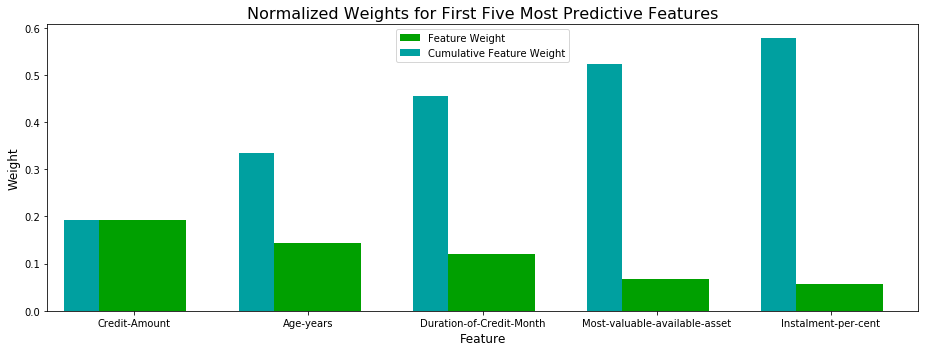

In [218]:
# Plot
feature_plot(importances, X_train, y_train)

## Conclusion:

Because my manager cares only about the best possible classification (and not about avoiding the financial losses connected with wrongful classification of uncreditworthy applicants, for instance), I decided to use the RANDOM FOREST model in the scoring part. After optimization, its overall accuracy is 0.77 and F1 score 0.84. <br> The five most important features used for prediction are amount of credit, age of the applicant, duration of credit in months, most valuable available asset and installment percent. The five features together have the weight of almost 60% in the model.<br>
As such, the model is optimized for sensitivity (biased towards true positives), which is might be ok for a small bank which strategy is to expand, but could be potentially financially detrimental in the long term, since some of the clients are misclassified and have high risk of defaulting (in which case bias towards true negatives makes more sense).<br>
Finally, having applied the forest model to the 500 new customer dataset, I got 447 creditworthy applicants. 